In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

f"{np.__version__=}"

"np.__version__='1.26.4'"

In [2]:
from laser_core.propertyset import PropertySet
from laser_generic import Model

In [3]:
scenario = pd.DataFrame(data=[["homenode", 1e6, "47°36′35″N 122°19′59″W"]], columns=["name", "population", "location"])
parameters = PropertySet({"seed": 2, "nticks": 730, "verbose": True, "beta": 0.1})
model = Model(scenario, parameters)

2024-12-05 03:10:40.955830: Creating the generic model…
Initializing the generic model with 1 patches…


In [4]:
from laser_generic.susceptibility import Susceptibility
from laser_generic.transmission import Transmission

model.components = [
    Susceptibility,
    Transmission,
]

In [5]:
from laser_generic.utils import seed_infections_randomly_SI

seed_infections_randomly_SI(model, ninfections=1)

In [6]:
model.run()

2024-12-05 03:10:48.296098: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:02<00:00, 306.14it/s]

Completed the generic model at 2024-12-05 03:10:50.685116…
Model       :         3,720 µs
Transmission:     2,353,127 µs
Total:            2,356,847 microseconds


(0.0, 250.0)

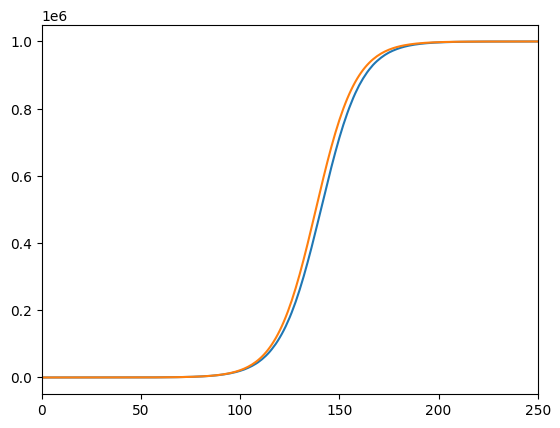

In [7]:
import matplotlib.pyplot as plt

plt.plot(model.patches.cases)
plt.plot(1e6 / (1 + (1e6 - 1) * np.exp(-0.1 * (np.arange(730)))))
plt.xlim([0, 250])
# plt.ylim([100, 150])

2024-12-05 03:12:02.890559: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:02.893908: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 877.42it/s]

Completed the generic model at 2024-12-05 03:12:03.729877…
Model       :         3,369 µs
Transmission:       809,096 µs
Total:              812,465 microseconds
2024-12-05 03:12:03.743348: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:03.745589: Running the generic model for 730 ticks…



/tmp/ipykernel_4748/247675944.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output = pd.concat([output, pd.DataFrame.from_dict({"seed": seed, "beta": beta, "cases": cases,
100%|██████████| 730/730 [00:00<00:00, 1024.53it/s]

Completed the generic model at 2024-12-05 03:12:04.460969…
Model       :         2,542 µs
Transmission:       697,944 µs
Total:              700,486 microseconds
2024-12-05 03:12:04.473646: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:04.475901: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 902.40it/s]

Completed the generic model at 2024-12-05 03:12:05.287462…
Model       :         2,488 µs
Transmission:       796,177 µs
Total:              798,665 microseconds
2024-12-05 03:12:05.308845: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:05.310315: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:01<00:00, 658.56it/s]

Completed the generic model at 2024-12-05 03:12:06.421828…
Model       :         2,921 µs
Transmission:     1,074,918 µs
Total:            1,077,839 microseconds
2024-12-05 03:12:06.432206: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:06.435487: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1036.37it/s]


Completed the generic model at 2024-12-05 03:12:07.143780…
Model       :         2,509 µs
Transmission:       687,799 µs
Total:              690,308 microseconds
2024-12-05 03:12:07.156085: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:07.158071: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 910.74it/s]

Completed the generic model at 2024-12-05 03:12:07.963044…
Model       :         2,699 µs
Transmission:       783,557 µs
Total:              786,256 microseconds
2024-12-05 03:12:07.975430: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:07.978446: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1031.55it/s]


Completed the generic model at 2024-12-05 03:12:08.692464…
Model       :         2,372 µs
Transmission:       691,820 µs
Total:              694,192 microseconds
2024-12-05 03:12:08.704968: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:08.707581: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 1036.72it/s]


Completed the generic model at 2024-12-05 03:12:09.414822…
Model       :         2,451 µs
Transmission:       691,366 µs
Total:              693,817 microseconds
2024-12-05 03:12:09.430831: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:09.434912: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 860.03it/s]

Completed the generic model at 2024-12-05 03:12:10.286982…
Model       :         2,789 µs
Transmission:       826,001 µs
Total:              828,790 microseconds
2024-12-05 03:12:10.301992: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:10.304629: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1012.38it/s]

Completed the generic model at 2024-12-05 03:12:11.029816…
Model       :         2,433 µs
Transmission:       702,845 µs
Total:              705,278 microseconds
2024-12-05 03:12:11.044031: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:11.046447: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 805.20it/s]


Completed the generic model at 2024-12-05 03:12:11.956731…
Model       :         2,670 µs
Transmission:       886,303 µs
Total:              888,973 microseconds
2024-12-05 03:12:11.969898: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:11.972241: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 1050.21it/s]


Completed the generic model at 2024-12-05 03:12:12.670617…
Model       :         2,397 µs
Transmission:       676,476 µs
Total:              678,873 microseconds
2024-12-05 03:12:12.681656: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:12.685522: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 958.09it/s] 

Completed the generic model at 2024-12-05 03:12:13.450913…
Model       :         2,486 µs
Transmission:       738,863 µs
Total:              741,349 microseconds
2024-12-05 03:12:13.461185: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:13.464064: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 863.05it/s]

Completed the generic model at 2024-12-05 03:12:14.314777…
Model       :         2,525 µs
Transmission:       829,420 µs
Total:              831,945 microseconds
2024-12-05 03:12:14.325986: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:14.330269: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 959.10it/s] 

Completed the generic model at 2024-12-05 03:12:15.095309…
Model       :         3,640 µs
Transmission:       743,577 µs
Total:              747,217 microseconds
2024-12-05 03:12:15.106732: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:15.109397: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1008.74it/s]

Completed the generic model at 2024-12-05 03:12:15.837762…
Model       :         2,499 µs
Transmission:       706,483 µs
Total:              708,982 microseconds
2024-12-05 03:12:15.848307: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:15.851391: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 983.60it/s] 

Completed the generic model at 2024-12-05 03:12:16.598215…
Model       :         2,649 µs
Transmission:       724,687 µs
Total:              727,336 microseconds
2024-12-05 03:12:16.614584: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:16.622030: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1036.35it/s]

Completed the generic model at 2024-12-05 03:12:17.330774…
Model       :         2,477 µs
Transmission:       687,076 µs
Total:              689,553 microseconds
2024-12-05 03:12:17.341664: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:17.344362: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1071.01it/s]

Completed the generic model at 2024-12-05 03:12:18.033673…
Model       :         2,535 µs
Transmission:       666,733 µs
Total:              669,268 microseconds
2024-12-05 03:12:18.044561: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:18.047736: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1278.84it/s]

Completed the generic model at 2024-12-05 03:12:18.623243…
Model       :         2,366 µs
Transmission:       556,391 µs
Total:              558,757 microseconds
2024-12-05 03:12:18.636817: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:18.639594: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1188.85it/s]


Completed the generic model at 2024-12-05 03:12:19.258764…
Model       :         2,450 µs
Transmission:       600,189 µs
Total:              602,639 microseconds
2024-12-05 03:12:19.277539: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:19.279741: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 1374.38it/s]

Completed the generic model at 2024-12-05 03:12:19.814724…
Model       :         2,288 µs
Transmission:       516,312 µs
Total:              518,600 microseconds
2024-12-05 03:12:19.824499: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:19.827463: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1081.36it/s]

Completed the generic model at 2024-12-05 03:12:20.506216…
Model       :         3,215 µs
Transmission:       658,170 µs
Total:              661,385 microseconds
2024-12-05 03:12:20.516297: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:20.520507: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1077.70it/s]

Completed the generic model at 2024-12-05 03:12:21.202977…
Model       :         2,386 µs
Transmission:       664,733 µs
Total:              667,119 microseconds
2024-12-05 03:12:21.213917: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:21.217884: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1285.50it/s]

Completed the generic model at 2024-12-05 03:12:21.790191…
Model       :         2,341 µs
Transmission:       554,809 µs
Total:              557,150 microseconds
2024-12-05 03:12:21.801189: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:21.804370: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1135.02it/s]

Completed the generic model at 2024-12-05 03:12:22.452642…
Model       :         2,990 µs
Transmission:       624,541 µs
Total:              627,531 microseconds
2024-12-05 03:12:22.462845: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:22.465967: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1201.68it/s]

Completed the generic model at 2024-12-05 03:12:23.078522…
Model       :         2,393 µs
Transmission:       591,549 µs
Total:              593,942 microseconds
2024-12-05 03:12:23.089509: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:23.092217: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1683.86it/s]


Completed the generic model at 2024-12-05 03:12:23.531378…
Model       :         2,201 µs
Transmission:       422,595 µs
Total:              424,796 microseconds
2024-12-05 03:12:23.542756: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:23.547276: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 1717.07it/s]

Completed the generic model at 2024-12-05 03:12:23.975975…
Model       :         2,307 µs
Transmission:       414,930 µs
Total:              417,237 microseconds
2024-12-05 03:12:23.988355: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:24.001231: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1428.86it/s]

Completed the generic model at 2024-12-05 03:12:24.518292…
Model       :         2,322 µs
Transmission:       491,025 µs
Total:              493,347 microseconds
2024-12-05 03:12:24.529239: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:24.531725: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1726.30it/s]

Completed the generic model at 2024-12-05 03:12:24.957862…
Model       :         2,257 µs
Transmission:       413,763 µs
Total:              416,020 microseconds
2024-12-05 03:12:24.968276: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:24.971130: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1180.49it/s]

Completed the generic model at 2024-12-05 03:12:25.593011…
Model       :         2,307 µs
Transmission:       603,969 µs
Total:              606,276 microseconds
2024-12-05 03:12:25.603417: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:25.606850: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1086.29it/s]


Completed the generic model at 2024-12-05 03:12:26.283784…
Model       :         2,420 µs
Transmission:       660,700 µs
Total:              663,120 microseconds
2024-12-05 03:12:26.294320: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:26.299583: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 1276.76it/s]

Completed the generic model at 2024-12-05 03:12:26.875242…
Model       :         2,511 µs
Transmission:       544,291 µs
Total:              546,802 microseconds
2024-12-05 03:12:26.897529: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:26.908349: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1132.05it/s]

Completed the generic model at 2024-12-05 03:12:27.556850…
Model       :         2,417 µs
Transmission:       627,864 µs
Total:              630,281 microseconds
2024-12-05 03:12:27.567304: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:27.572340: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1304.02it/s]

Completed the generic model at 2024-12-05 03:12:28.142771…
Model       :         2,443 µs
Transmission:       539,486 µs
Total:              541,929 microseconds
2024-12-05 03:12:28.162949: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:28.167847: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1518.19it/s]

Completed the generic model at 2024-12-05 03:12:28.652907…
Model       :         2,363 µs
Transmission:       467,522 µs
Total:              469,885 microseconds
2024-12-05 03:12:28.663812: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:28.669467: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1913.19it/s]

Completed the generic model at 2024-12-05 03:12:29.054940…
Model       :         2,231 µs
Transmission:       371,056 µs
Total:              373,287 microseconds
2024-12-05 03:12:29.064685: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:29.066668: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1996.10it/s]

Completed the generic model at 2024-12-05 03:12:29.436101…
Model       :         2,201 µs
Transmission:       356,903 µs
Total:              359,104 microseconds
2024-12-05 03:12:29.447106: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:29.450651: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1863.86it/s]

Completed the generic model at 2024-12-05 03:12:29.847195…
Model       :         2,254 µs
Transmission:       380,680 µs
Total:              382,934 microseconds
2024-12-05 03:12:29.858614: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:29.861030: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1207.02it/s]

Completed the generic model at 2024-12-05 03:12:30.472932…
Model       :         2,395 µs
Transmission:       592,070 µs
Total:              594,465 microseconds
2024-12-05 03:12:30.483105: Creating the generic model…


Initializing the generic model with 1 patches…
2024-12-05 03:12:30.486850: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 1939.27it/s]

Completed the generic model at 2024-12-05 03:12:30.867709…
Model       :         2,138 µs
Transmission:       365,904 µs
Total:              368,042 microseconds
2024-12-05 03:12:30.877816: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:30.881365: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1904.80it/s]

Completed the generic model at 2024-12-05 03:12:31.269489…
Model       :         2,201 µs
Transmission:       369,953 µs
Total:              372,154 microseconds
2024-12-05 03:12:31.279627: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:31.283402: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1961.86it/s]

Completed the generic model at 2024-12-05 03:12:31.660729…
Model       :         2,097 µs
Transmission:       361,728 µs
Total:              363,825 microseconds
2024-12-05 03:12:31.671806: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:31.675199: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2141.61it/s]

Completed the generic model at 2024-12-05 03:12:32.022074…
Model       :         2,201 µs
Transmission:       330,070 µs
Total:              332,271 microseconds
2024-12-05 03:12:32.031833: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:32.035306: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2103.95it/s]

Completed the generic model at 2024-12-05 03:12:32.389297…
Model       :         2,169 µs
Transmission:       333,498 µs
Total:              335,667 microseconds
2024-12-05 03:12:32.399462: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:32.402971: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1781.00it/s]

Completed the generic model at 2024-12-05 03:12:32.816427…
Model       :         2,177 µs
Transmission:       399,505 µs
Total:              401,682 microseconds
2024-12-05 03:12:32.827014: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:32.830265: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1782.30it/s]


Completed the generic model at 2024-12-05 03:12:33.244319…
Model       :         2,153 µs
Transmission:       396,599 µs
Total:              398,752 microseconds
2024-12-05 03:12:33.259796: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:33.262061: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 1674.00it/s]

Completed the generic model at 2024-12-05 03:12:33.701719…
Model       :         2,282 µs
Transmission:       426,598 µs
Total:              428,880 microseconds
2024-12-05 03:12:33.711762: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:33.714731: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1807.64it/s]

Completed the generic model at 2024-12-05 03:12:34.122192…
Model       :         2,105 µs
Transmission:       394,676 µs
Total:              396,781 microseconds
2024-12-05 03:12:34.133763: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:34.136482: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2044.56it/s]

Completed the generic model at 2024-12-05 03:12:34.497254…
Model       :         2,151 µs
Transmission:       348,150 µs
Total:              350,301 microseconds
2024-12-05 03:12:34.507724: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:34.511037: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1750.88it/s]

Completed the generic model at 2024-12-05 03:12:34.931849…
Model       :         2,211 µs
Transmission:       405,419 µs
Total:              407,630 microseconds
2024-12-05 03:12:34.943141: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:34.945979: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2334.39it/s]

Completed the generic model at 2024-12-05 03:12:35.262550…
Model       :         2,075 µs
Transmission:       303,708 µs
Total:              305,783 microseconds
2024-12-05 03:12:35.274587: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:35.277285: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1854.71it/s]

Completed the generic model at 2024-12-05 03:12:35.676382…
Model       :         2,142 µs
Transmission:       380,858 µs
Total:              383,000 microseconds
2024-12-05 03:12:35.686923: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:35.690001: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2279.77it/s]

Completed the generic model at 2024-12-05 03:12:36.014468…
Model       :         2,535 µs
Transmission:       309,614 µs
Total:              312,149 microseconds
2024-12-05 03:12:36.024533: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:36.027867: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2271.23it/s]

Completed the generic model at 2024-12-05 03:12:36.353126…
Model       :         2,191 µs
Transmission:       312,118 µs
Total:              314,309 microseconds
2024-12-05 03:12:36.364364: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:36.367062: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2087.86it/s]

Completed the generic model at 2024-12-05 03:12:36.721233…
Model       :         7,501 µs
Transmission:       335,419 µs
Total:              342,920 microseconds
2024-12-05 03:12:36.731630: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:36.734585: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2515.15it/s]


Completed the generic model at 2024-12-05 03:12:37.029608…
Model       :         2,039 µs
Transmission:       282,289 µs
Total:              284,328 microseconds
2024-12-05 03:12:37.046662: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:37.049063: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 1468.20it/s]

Completed the generic model at 2024-12-05 03:12:37.549816…
Model       :         2,397 µs
Transmission:       484,044 µs
Total:              486,441 microseconds
2024-12-05 03:12:37.560098: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:37.562773: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2554.23it/s]

Completed the generic model at 2024-12-05 03:12:37.852888…
Model       :         2,009 µs
Transmission:       277,995 µs
Total:              280,004 microseconds
2024-12-05 03:12:37.862964: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:37.866200: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2272.55it/s]

Completed the generic model at 2024-12-05 03:12:38.191392…
Model       :         2,022 µs
Transmission:       311,139 µs
Total:              313,161 microseconds
2024-12-05 03:12:38.201525: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:38.204627: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2143.39it/s]

Completed the generic model at 2024-12-05 03:12:38.550326…
Model       :         2,179 µs
Transmission:       329,952 µs
Total:              332,131 microseconds
2024-12-05 03:12:38.561584: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:38.565253: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2242.52it/s]

Completed the generic model at 2024-12-05 03:12:38.895733…
Model       :         2,226 µs
Transmission:       317,187 µs
Total:              319,413 microseconds
2024-12-05 03:12:38.907103: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:38.909635: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1869.11it/s]

Completed the generic model at 2024-12-05 03:12:39.305368…
Model       :         2,228 µs
Transmission:       381,433 µs
Total:              383,661 microseconds
2024-12-05 03:12:39.316165: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:39.318490: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1978.29it/s]

Completed the generic model at 2024-12-05 03:12:39.690960…
Model       :         2,267 µs
Transmission:       355,468 µs
Total:              357,735 microseconds
2024-12-05 03:12:39.701009: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:39.704620: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2539.91it/s]

Completed the generic model at 2024-12-05 03:12:39.995665…
Model       :         2,053 µs
Transmission:       279,140 µs
Total:              281,193 microseconds
2024-12-05 03:12:40.006449: Creating the generic model…
Initializing the generic model with 1 patches…


2024-12-05 03:12:40.009613: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 2496.86it/s]


Completed the generic model at 2024-12-05 03:12:40.305855…
Model       :         2,125 µs
Transmission:       284,566 µs
Total:              286,691 microseconds
2024-12-05 03:12:40.319266: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:40.321474: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 1744.19it/s]

Completed the generic model at 2024-12-05 03:12:40.743564…
Model       :         2,414 µs
Transmission:       407,967 µs
Total:              410,381 microseconds
2024-12-05 03:12:40.753876: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:40.758282: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2089.38it/s]

Completed the generic model at 2024-12-05 03:12:41.112221…
Model       :         2,079 µs
Transmission:       339,843 µs
Total:              341,922 microseconds
2024-12-05 03:12:41.122582: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:41.127312: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2488.26it/s]


Completed the generic model at 2024-12-05 03:12:41.423640…
Model       :         2,032 µs
Transmission:       286,424 µs
Total:              288,456 microseconds
2024-12-05 03:12:41.435634: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:41.437654: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 2968.54it/s]

Completed the generic model at 2024-12-05 03:12:41.686004…
Model       :         1,991 µs
Transmission:       239,152 µs
Total:              241,143 microseconds
2024-12-05 03:12:41.697197: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:41.700551: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2836.80it/s]

Completed the generic model at 2024-12-05 03:12:41.962239…
Model       :         1,927 µs
Transmission:       248,998 µs
Total:              250,925 microseconds
2024-12-05 03:12:41.972771: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:41.977392: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2671.26it/s]

Completed the generic model at 2024-12-05 03:12:42.255603…
Model       :         2,120 µs
Transmission:       264,574 µs
Total:              266,694 microseconds
2024-12-05 03:12:42.267776: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:42.275684: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2113.45it/s]

Completed the generic model at 2024-12-05 03:12:42.624611…
Model       :         2,083 µs
Transmission:       335,250 µs
Total:              337,333 microseconds
2024-12-05 03:12:42.635315: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:42.637894: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2049.19it/s]

Completed the generic model at 2024-12-05 03:12:42.997889…
Model       :         7,913 µs
Transmission:       340,866 µs
Total:              348,779 microseconds
2024-12-05 03:12:43.008700: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:43.012096: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2502.29it/s]


Completed the generic model at 2024-12-05 03:12:43.308687…
Model       :         2,186 µs
Transmission:       281,829 µs
Total:              284,015 microseconds
2024-12-05 03:12:43.331582: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:43.333867: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 2638.06it/s]

Completed the generic model at 2024-12-05 03:12:43.615799…
Model       :         2,097 µs
Transmission:       269,445 µs
Total:              271,542 microseconds
2024-12-05 03:12:43.627086: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:43.629811: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2535.15it/s]

Completed the generic model at 2024-12-05 03:12:43.922172…
Model       :         2,091 µs
Transmission:       279,471 µs
Total:              281,562 microseconds
2024-12-05 03:12:43.933241: Creating the generic model…
Initializing the generic model with 1 patches…


2024-12-05 03:12:43.936434: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 2456.27it/s]


Completed the generic model at 2024-12-05 03:12:44.237375…
Model       :         2,030 µs
Transmission:       288,634 µs
Total:              290,664 microseconds
2024-12-05 03:12:44.249818: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:44.252294: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 2244.87it/s]

Completed the generic model at 2024-12-05 03:12:44.580672…
Model       :         2,189 µs
Transmission:       314,927 µs
Total:              317,116 microseconds
2024-12-05 03:12:44.593446: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:44.597693: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2706.49it/s]

Completed the generic model at 2024-12-05 03:12:44.872461…
Model       :         1,981 µs
Transmission:       257,352 µs
Total:              259,333 microseconds
2024-12-05 03:12:44.893465: Creating the generic model…


Initializing the generic model with 1 patches…
2024-12-05 03:12:44.911790: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 2291.50it/s]

Completed the generic model at 2024-12-05 03:12:45.235604…
Model       :         2,153 µs
Transmission:       308,813 µs
Total:              310,966 microseconds
2024-12-05 03:12:45.252997: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:45.255507: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2606.14it/s]

Completed the generic model at 2024-12-05 03:12:45.541953…
Model       :         2,031 µs
Transmission:       271,548 µs
Total:              273,579 microseconds
2024-12-05 03:12:45.554303: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:45.557026: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2149.71it/s]

Completed the generic model at 2024-12-05 03:12:45.902008…
Model       :         2,268 µs
Transmission:       327,248 µs
Total:              329,516 microseconds
2024-12-05 03:12:45.913717: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:45.919322: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2822.09it/s]

Completed the generic model at 2024-12-05 03:12:46.183026…
Model       :         2,062 µs
Transmission:       250,636 µs
Total:              252,698 microseconds
2024-12-05 03:12:46.194992: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:46.197910: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2549.70it/s]

Completed the generic model at 2024-12-05 03:12:46.488043…
Model       :         2,100 µs
Transmission:       278,936 µs
Total:              281,036 microseconds
2024-12-05 03:12:46.499496: Creating the generic model…
Initializing the generic model with 1 patches…


2024-12-05 03:12:46.502094: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 2796.25it/s]

Completed the generic model at 2024-12-05 03:12:46.767347…
Model       :         2,092 µs
Transmission:       252,387 µs
Total:              254,479 microseconds
2024-12-05 03:12:46.778200: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:46.780976: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2938.03it/s]

Completed the generic model at 2024-12-05 03:12:47.033650…
Model       :         2,095 µs
Transmission:       240,024 µs
Total:              242,119 microseconds
2024-12-05 03:12:47.045382: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:47.048416: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2414.12it/s]


Completed the generic model at 2024-12-05 03:12:47.359719…
Model       :         2,093 µs
Transmission:       294,645 µs
Total:              296,738 microseconds
2024-12-05 03:12:47.371455: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:47.375309: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 1530.25it/s]

Completed the generic model at 2024-12-05 03:12:47.856524…
Model       :         2,328 µs
Transmission:       464,711 µs
Total:              467,039 microseconds
2024-12-05 03:12:47.867544: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:47.870653: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 3002.14it/s]

Completed the generic model at 2024-12-05 03:12:48.116806…
Model       :         2,003 µs
Transmission:       235,982 µs
Total:              237,985 microseconds
2024-12-05 03:12:48.128501: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:48.131658: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2476.97it/s]


Completed the generic model at 2024-12-05 03:12:48.431576…
Model       :         2,071 µs
Transmission:       284,205 µs
Total:              286,276 microseconds
2024-12-05 03:12:48.448209: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:48.456068: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 2658.86it/s]

Completed the generic model at 2024-12-05 03:12:48.733842…
Model       :         2,059 µs
Transmission:       266,336 µs
Total:              268,395 microseconds
2024-12-05 03:12:48.745044: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:48.747850: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 3228.02it/s]

Completed the generic model at 2024-12-05 03:12:48.978165…
Model       :         1,931 µs
Transmission:       217,714 µs
Total:              219,645 microseconds
2024-12-05 03:12:48.989569: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:48.992007: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2575.11it/s]


Completed the generic model at 2024-12-05 03:12:49.286059…
Model       :         2,060 µs
Transmission:       271,120 µs
Total:              273,180 microseconds
2024-12-05 03:12:49.301240: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:49.303906: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 2821.02it/s]

Completed the generic model at 2024-12-05 03:12:49.565629…
Model       :         2,057 µs
Transmission:       251,128 µs
Total:              253,185 microseconds
2024-12-05 03:12:49.579294: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:49.582606: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2941.19it/s]

Completed the generic model at 2024-12-05 03:12:49.834398…
Model       :         2,020 µs
Transmission:       240,312 µs
Total:              242,332 microseconds
2024-12-05 03:12:49.846944: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:49.853109: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2296.00it/s]

Completed the generic model at 2024-12-05 03:12:50.174432…
Model       :         2,097 µs
Transmission:       308,432 µs
Total:              310,529 microseconds
2024-12-05 03:12:50.185864: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:50.188309: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2321.58it/s]

Completed the generic model at 2024-12-05 03:12:50.506248…
Model       :         2,074 µs
Transmission:       303,993 µs
Total:              306,067 microseconds
2024-12-05 03:12:50.527851: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-05 03:12:50.530556: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 3076.46it/s]

Completed the generic model at 2024-12-05 03:12:50.772048…
Model       :         2,024 µs
Transmission:       228,730 µs
Total:              230,754 microseconds


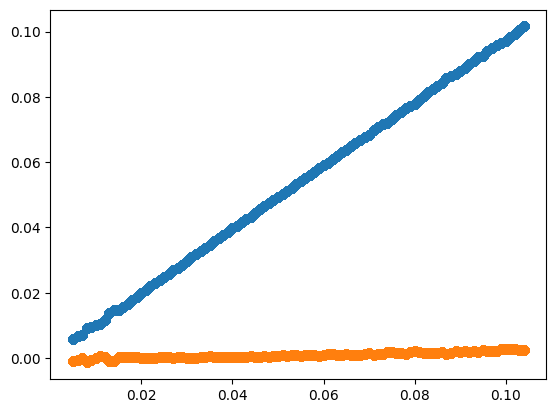

In [9]:
from scipy.optimize import curve_fit

def SI_logistic(t, beta, size, t0):
    return size / (1 + (size-1) * np.exp(-beta * (t-t0)))

nticks = 730
t = np.arange(730)

seeds = [i for i in range(100)]
betas = [0.001*i for i in range(5, 105)]
output = pd.DataFrame(columns=["seed", "beta", "cases", "fitted_beta", "fitted_size", "fitted_t0"])
scenario = pd.DataFrame(data=[["homenode", 1e5, "47°36′35″N 122°19′59″W"]], columns=["name", "population", "location"])

for seed, beta in zip(seeds, betas):
    parameters = PropertySet({"seed": seed, "nticks": nticks, "verbose": True, "beta": beta})
    model = Model(scenario, parameters)
    model.components = [
        Susceptibility,
        Transmission,
    ]
    seed_infections_randomly_SI(model, ninfections=1)
    model.run()
    cases = [model.patches.cases[i][0] for i in range(nticks)]
    popt, pcov = curve_fit(SI_logistic, t, cases, p0=[0.05, 1.1e5, 1])
    output = pd.concat([output, pd.DataFrame.from_dict({"seed": seed, "beta": beta, "cases": cases, 
                                            "fitted_beta": popt[0], "fitted_size": popt[1], "fitted_t0": popt[2]})], ignore_index=True)
    

plt.plot(output["beta"], output["fitted_beta"], "o")
plt.plot(output["beta"], output["beta"] - output["fitted_beta"], "o")





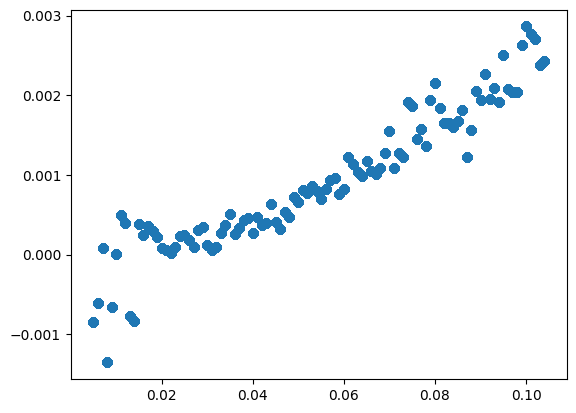

In [11]:
plt.plot(output["beta"], output["beta"]-output["fitted_beta"], "o")


In [24]:
output

,seed,beta,cases,fitted_beta,fitted_size,fitted_t0
